In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/kadam/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Index(['country', 'year', 'income_category', 'totalprofit'], dtype='object')


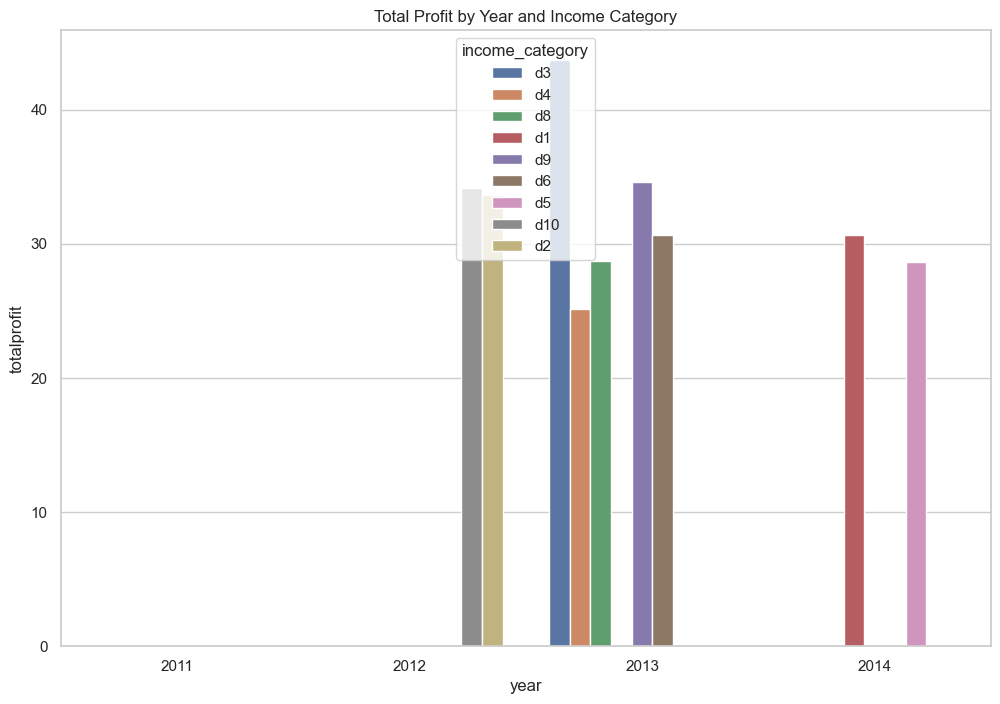

In [5]:
import psycopg2

# Replace these variables with your actual database credentials
db_host = 'localhost'
db_port = '5432'
db_name = 'Project'
db_user = 'cs689'
db_password = '14nautanki'

# Establish a connection to the database
conn = psycopg2.connect(
    host=db_host,
    port=db_port,
    database=db_name,
    user=db_user,
    password=db_password
)

# Create a cursor to execute SQL queries
cursor = conn.cursor()

# Now you can use 'conn' and 'cursor' to execute your SQL queries

query = """
SELECT
    l.Country,
    m.Year,
    pi.Income_Category,
    COALESCE(SUM(sf.Profit_avg), 0) AS TotalProfit
FROM
    SalesCumFact sf
LEFT JOIN
    PopIncomeDim pi ON sf.ProdDim_Id = pi.PopIncome_Id
LEFT JOIN
    LocationDim l ON sf.Location_Id = l.Location_Id
LEFT JOIN
    MonthDim m ON sf.MonthId = m.MonthId
GROUP BY
    l.Country, m.Year, pi.Income_Category
"""

# Fetch data into a DataFrame
df = pd.read_sql_query(query, conn)
print(df.columns)
# Visualize the data using seaborn or matplotlib
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x="year", y="totalprofit", hue="income_category", data=df, ci=None)
plt.title('Total Profit by Year and Income Category')
plt.show()

# Don't forget to close the cursor and connection when you're done
cursor.close()
conn.close()


/Users/kadam/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Index(['country', 'year', 'quarter', 'total_sales_all_years'], dtype='object')


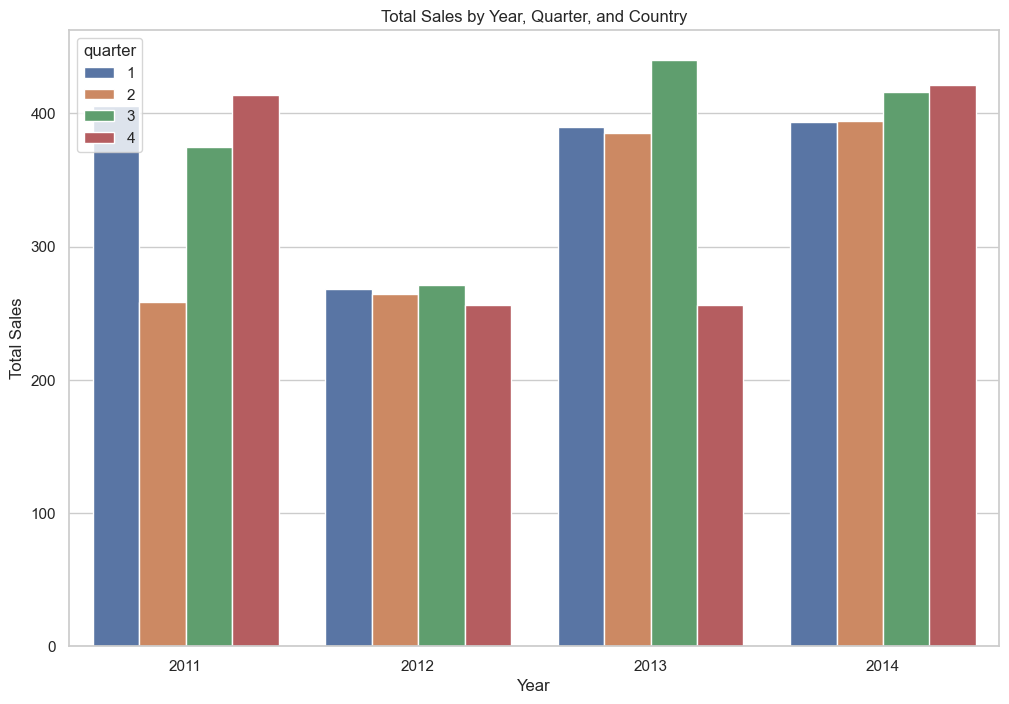

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

db_host = 'localhost'
db_port = '5432'
db_name = 'Project'
db_user = 'cs689'
db_password = '14nautanki'

# Establish a connection to the database
conn = psycopg2.connect(
    host=db_host,
    port=db_port,
    database=db_name,
    user=db_user,
    password=db_password
)

# Create a cursor to execute SQL queries
cursor = conn.cursor()


# Execute the SQL query and fetch the data into a DataFrame
query = """
SELECT
    cd.customer_country AS Country,
    md.Year,
    md.Quarter,
    SUM(scf.Sales_avg) AS total_sales_all_years
FROM
    SalesCumFact scf
JOIN
    MonthDim md ON scf.MonthId = md.MonthId
JOIN
    CustomerDim cd ON scf.customerId = cd.customerId
GROUP BY
    cd.customer_country, md.Year, md.Quarter
ORDER BY
    cd.customer_country, md.Year, md.Quarter;
"""

# Fetch data into a DataFrame
df = pd.read_sql_query(query, conn)
print(df.columns)

# Visualize the data using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x="year", y="total_sales_all_years", hue="quarter", data=df, ci=None)

# Set plot title and labels
plt.title('Total Sales by Year, Quarter, and Country')
plt.xlabel('Year')
plt.ylabel('Total Sales')

# Show the plot
plt.show()


/Users/kadam/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Index(['rowid', 'Consumer', 'Corporate', 'Home Office'], dtype='object')


<Figure size 1200x800 with 0 Axes>

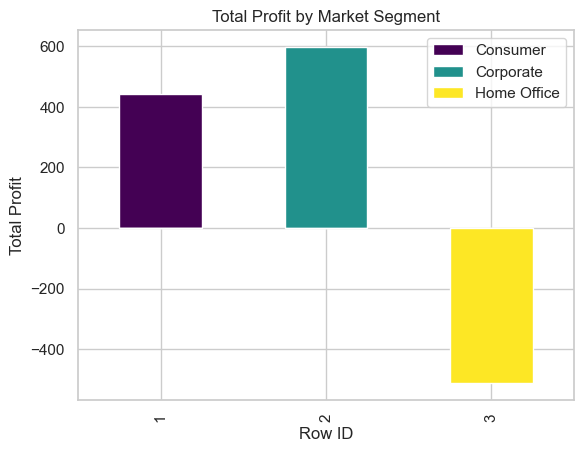

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


db_host = 'localhost'
db_port = '5432'
db_name = 'Project'
db_user = 'cs689'
db_password = '14nautanki'

# Establish a connection to the database
conn = psycopg2.connect(
    host=db_host,
    port=db_port,
    database=db_name,
    user=db_user,
    password=db_password
)

# Create a cursor to execute SQL queries
cursor = conn.cursor()

# Execute the crosstab SQL query and fetch the data into a DataFrame
query = """
SELECT * FROM crosstab(
  'SELECT 
      COALESCE(row_number() OVER (), 0) AS rowid,
      MarketDim.market_segment, 
      SUM(SalesFact.Profit) AS total_profit
   FROM MarketDim
   JOIN SalesFact ON MarketDim.Market_Id = SalesFact.Market_Id
   GROUP BY MarketDim.market_segment
   ORDER BY 2,1',
  'VALUES (''Consumer''::text), (''Corporate''::text), (''Home Office''::text)'
) AS ct ("rowid" int, "Consumer" numeric, "Corporate" numeric, "Home Office" numeric);
"""

# Fetch data into a DataFrame
df = pd.read_sql_query(query, conn)
print(df.columns)

# Visualize the data using matplotlib
plt.figure(figsize=(12, 8))

# Plot the data using a bar plot
df.set_index("rowid").plot(kind="bar", stacked=True, colormap="viridis")

# Set plot title and labels
plt.title('Total Profit by Market Segment')
plt.xlabel('Row ID')
plt.ylabel('Total Profit')

# Show the plot
plt.show()


/Users/kadam/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Index(['incomebracket', 'product_category', 'totalsales'], dtype='object')


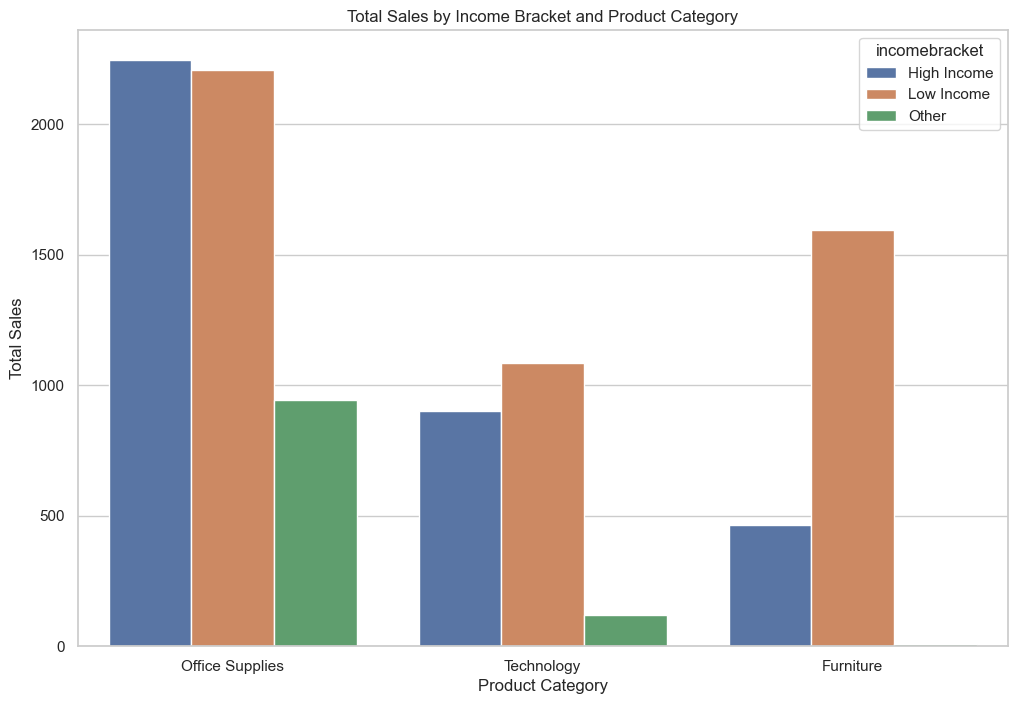

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


db_host = 'localhost'
db_port = '5432'
db_name = 'Project'
db_user = 'cs689'
db_password = '14nautanki'

# Establish a connection to the database
conn = psycopg2.connect(
    host=db_host,
    port=db_port,
    database=db_name,
    user=db_user,
    password=db_password
)

# Create a cursor to execute SQL queries
cursor = conn.cursor()
# Execute the SQL query and fetch the data into a DataFrame
query = """
SELECT
    CASE
        WHEN pid.Income_Category IN ('d1', 'd2', 'd3') THEN 'High Income'
        WHEN pid.Income_Category IN ('d4', 'd5', 'd6', 'd7', 'd8') THEN 'Low Income'
        ELSE 'Other'
    END AS IncomeBracket,
    pd.Product_Category,
    COALESCE(SUM(sf.Sales), 0) AS TotalSales
FROM
    ProductDim pd
LEFT JOIN
    SalesFact sf ON pd.ProdDim_Id = sf.ProdDim_Id
LEFT JOIN
    LocationDim ld ON sf.Location_Id = ld.Location_Id
LEFT JOIN
    PopIncomeDim pid ON sf.PopIncome_Id = pid.PopIncome_Id
GROUP BY
    IncomeBracket, pd.Product_Category
ORDER BY
    IncomeBracket, TotalSales DESC;
"""

# Fetch data into a DataFrame
df = pd.read_sql_query(query, conn)
print(df.columns)

# Visualize the data using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x="product_category", y="totalsales", hue="incomebracket", data=df)

# Set plot title and labels
plt.title('Total Sales by Income Bracket and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')

# Show the plot
plt.show()


/Users/kadam/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Index(['shipment_mode', 'order_priority', 'averageshippingcost'], dtype='object')


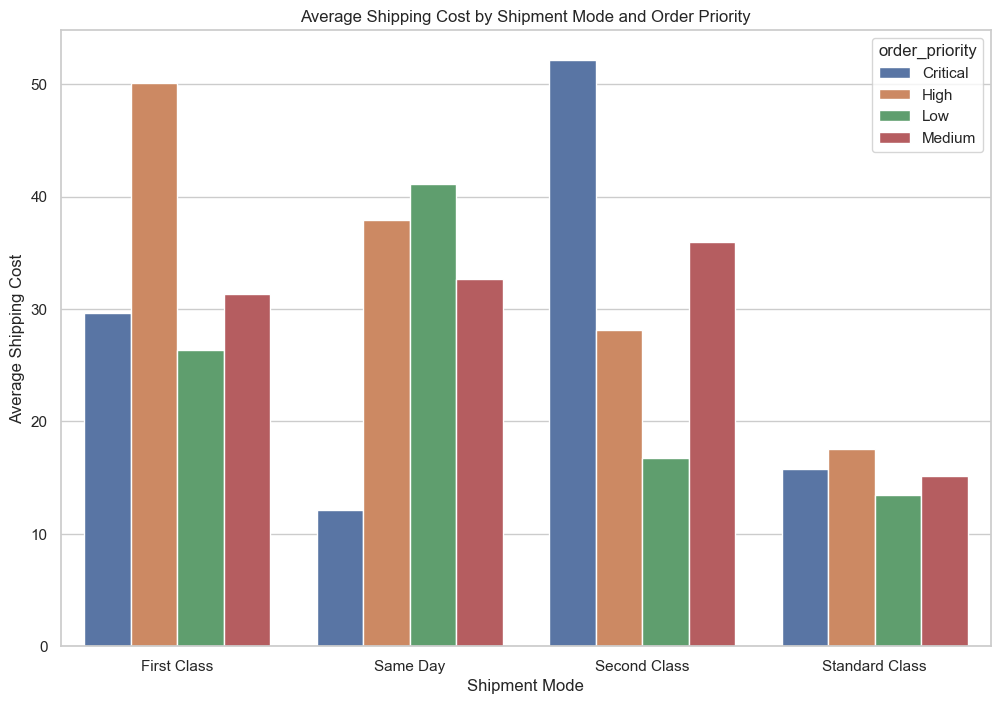

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


db_host = 'localhost'
db_port = '5432'
db_name = 'Project'
db_user = 'cs689'
db_password = '14nautanki'

# Establish a connection to the database
conn = psycopg2.connect(
    host=db_host,
    port=db_port,
    database=db_name,
    user=db_user,
    password=db_password
)

# Create a cursor to execute SQL queries
cursor = conn.cursor()

# Execute the SQL query and fetch the data into a DataFrame
query = """
SELECT
    sd.shipment_mode,
    od.Order_Priority,
    AVG(sf.Shipping_Cost) AS AverageShippingCost
FROM
    ShipmentFact sf
JOIN
    OrderDim od ON sf.OrderId = od.OrderId
JOIN
    ShipmentDim sd ON sf.Shipment_Id = sd.Shipment_Id
GROUP BY
    sd.shipment_mode, od.Order_Priority
ORDER BY
    sd.shipment_mode, od.Order_Priority;
"""

# Fetch data into a DataFrame
df = pd.read_sql_query(query, conn)
print(df.columns)

# Visualize the data using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x="shipment_mode", y="averageshippingcost", hue="order_priority", data=df, ci=None)

# Set plot title and labels
plt.title('Average Shipping Cost by Shipment Mode and Order Priority')
plt.xlabel('Shipment Mode')
plt.ylabel('Average Shipping Cost')

# Show the plot
plt.show()
